## Decomposing forces into different axes



In this lab, we will see that the same vector can be decomposed many different ways. Previously, we chose to decompose vectors into their components along the $x$ and $y$ axes, but here we will see that any choice of axes is valid as long as they are perpendicular to each other. Finally, we will see this in an application to a block on a ramp



In [11]:
# Import statements
# Feel free to ignore this cell!
%matplotlib inline
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
from matplotlib import animation, rc


title_size = 25

# Helper functions for drawing vectors
def draw_vector_component(ax, v_x,v_y, color='blue', origin=[0,0], alpha=1):
    ax.arrow(origin[0], origin[1], v_x, v_y,
              color=color,
              head_width=0.2,
              head_length=0.1,
              zorder=3,
              alpha=alpha)


def draw_vector_r_theta(ax, r, theta, color='blue', origin=[0,0], alpha=1):
    v_x = r * np.cos(np.deg2rad(theta))
    v_y = r * np.sin(np.deg2rad(theta))
    draw_vector_component(ax, v_x,v_y, color=color, origin=origin, alpha=alpha)


def decompose_vector_axis(v_x, v_y, angle):
    v_x_prime = v_x * np.cos(np.deg2rad(angle)) + v_y * np.sin(np.deg2rad(angle))
    v_y_prime = -v_x * np.sin(np.deg2rad(angle)) + v_y * np.cos(np.deg2rad(angle))
    return v_x_prime, v_y_prime


def graph_lims(v_x, v_y):
    magnitude = np.sqrt(v_x**2 + v_y**2)    # Pythagorean theorem
    if v_y > 0:
        ylims = (0, magnitude)
    else:
        ylims = (-magnitude, 0)
    if v_x > 0:
        xlims = (0, magnitude)
    else:
        xlims = (-magnitude, 0)
    return xlims, ylims


def vector_fig_setup(scale=6):
    plt.figure(figsize=(scale,scale))
    ax = plt.gca()
    for spine in ax.spines.values():  # adjust spines on last active axis 
        spine.set_position(("data", 0))
        ax.grid(True)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    return ax


def clear_ax_tick_labels(ax):
    ax.get_xaxis().set_ticklabels([])
    ax.get_yaxis().set_ticklabels([])


def hide_spines(ax):
    [s.set_visible(False) for s in ax.spines.values()]

## Decomposing a vector (review)



Let's suppose we start with the following vector $\vec{v} = 3 \hat{i} + 4 \hat{j}$. Equivalently, this could be described as $r = \sqrt{3^2 + 4^2} = 5$ and $\theta = \arctan(4/3)$ from the horizontal.



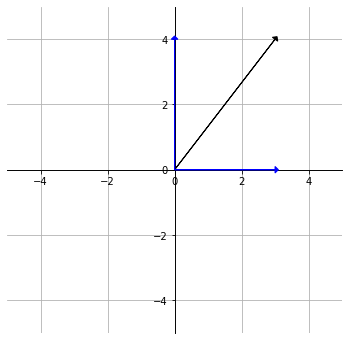

In [12]:
ax = vector_fig_setup()
draw_vector_component(ax, 3, 4, 'black') #full vector
x_axis_angle = 0
x, y = decompose_vector_axis(3, 4, x_axis_angle)
draw_vector_r_theta(ax, x, x_axis_angle, 'blue') # x component
draw_vector_r_theta(ax, y, x_axis_angle + 90, 'blue') # y component

What we have drawn here are the components of $\vec{v}$ along the x and y directions. The orange arrow marks how far along the $x$ axis $\vec{v}$ makes it (AKA the horizontal component). From the diagram, we can see that the length of the horizontal blue arrow is 3. Similarly for the $y$ direction. This precisely matches the our notation $\vec{v} = 3\hat{i} + 4\hat{j}$ since $\hat{i}$ and $\hat{j}$ are unit vectors along these two axes!



## Choosing a different set of axes



Let's now rotate our $x$ and $y$ axes so they are no longer pointing up and down, but rotated by an angle $\phi = 30^\circ$.



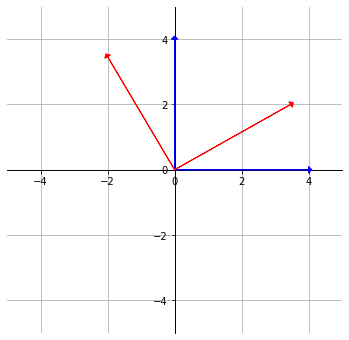

In [13]:
ax = vector_fig_setup()
magnitude = 4
x_angle = 0
y_angle = 90
draw_vector_r_theta(ax, magnitude, x_angle, 'blue') # x axis
draw_vector_r_theta(ax, magnitude, y_angle, 'blue') # y axis

# Rotated version
rotation_angle = 30
draw_vector_r_theta(ax, magnitude, x_angle + rotation_angle, 'red')
draw_vector_r_theta(ax, magnitude, y_angle + rotation_angle, 'red')

# TODO: add text caption

Let's now try to decompose our original vector along these new axes

Normally, to switch between $r, \theta$ and $x, y$, we apply the following identities

$$x = r\sin \theta\, , \, y = r \cos\theta$$.

Importantly, this $\theta$ is between the vector and the horizontal axis. Now that we have rotated our axes, we need to take this into account in our picture! Namely,

$$\theta' = \theta - 30^\circ$$

Note there is a minus sign because the angle shrunk as we rotated the axes a positive amount.



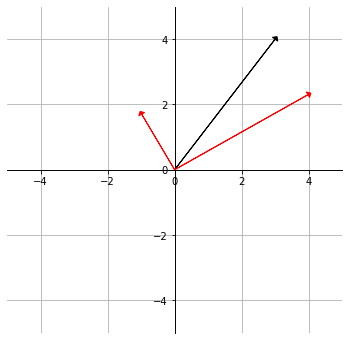

In [14]:
ax = vector_fig_setup()
draw_vector_component(ax, 3, 4, 'black') #full vector
x_axis_angle = 30
x, y = decompose_vector_axis(3, 4, x_axis_angle)
draw_vector_r_theta(ax, x, x_axis_angle, 'red') # x component
draw_vector_r_theta(ax, y, x_axis_angle + 90, 'red') # y component

## Widget for rotating axis



In [15]:
@interact(angle=widgets.FloatSlider(0, min=0, max=360, description='angle (deg)'), continuous_update=False)
def rotating_axes(angle):
    ax = vector_fig_setup()
    draw_vector_component(ax, 3, 4, 'black') #full vector
    x_axis_angle = angle
    x, y = decompose_vector_axis(3, 4, x_axis_angle)
    draw_vector_r_theta(ax, x, x_axis_angle, 'purple') # x' component
    draw_vector_r_theta(ax, y, x_axis_angle + 90, 'purple') # y' component

    magnitude = 4.5
    draw_vector_r_theta(ax, magnitude, x_axis_angle, 'red', alpha=0.5) # x' axis
    draw_vector_r_theta(ax, magnitude, x_axis_angle + 90, 'red', alpha=0.5) # y' axis

interactive(children=(FloatSlider(value=0.0, description='angle (deg)', max=360.0), Output()), _dom_classes=('…

### Questions



-   For what choice of axis rotation does one of the components become zero?
-   Can you find any other angles for which this works?
-   For what range of angles does the $x'$ component become negative?
-   For what range of angles does the $y'$ component become negative?



## Newton's second law as a vector equation



NSL relates the net force on an object to mass $\times$ acceleration.

$$\vec{F}_{\text{net}} = m \vec{a}$$

This is a vector statement, but in order to make it easier to calculate, we usually work with the *components*. For 2d motion, this will give 2 separate equations that come from analyzing the $x$ and $y$ components individually.



## Free body for an object sliding on horizontal ground



Let's consider a crate on the ground that we push horizontally.

The free body diagram should have 3 forces on it. The normal force (because the crate is touching the ground), the gravitational force (assuming we are on earth), and the applied force we give it. We are ignoring friction for now, but it is likely there as well!



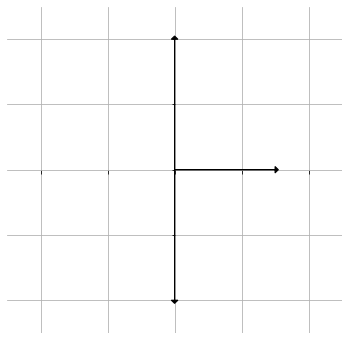

In [16]:
# Draw FBD
ax = vector_fig_setup()
draw_vector_component(ax, 0, 4, 'black') # Normal Force (directly up)
draw_vector_component(ax, 0, -4, 'black') # Gravitational Force (balanced with Normal force)
draw_vector_component(ax, 3, 0, 'black') # Applied force to the right
clear_ax_tick_labels(ax)
hide_spines(ax)

We know that $\vec{F}_{\text{net}} = \vec{F}_N + \vec{F}_g + \vec{F}_{\text{applied}}$ since we have identified these as all the forces acting in the free body diagram.

To apply this, we will break it down into components

$$ y: {F}_{\text{net}, y} = {F}_{N,y} + {F}_{g,y} + {F}_{\text{applied}, y}$$
$$ x: {F}_{\text{net}, x} = {F}_{N,x} + {F}_{g,x} + {F}_{\text{applied}, x}$$

Based on the diagram, all our forces are either directed vertically or horizontally, so this simplifies these equations a bit

$$ y: {F}_{\text{net}, y} = F_N - F_g = m a_y$$
$$ x: {F}_{\text{net}, x} = {F}_{\text{applied}} = m a_x$$

Here is where we use some physical reasoning about the problem. Because the crate is sliding along the ground and doesn't lift off or sink into the ground, there is no acceleration in the $y$ direction, therefore $a_y$ must be zero. (This also tells us that F<sub>N</sub> and F<sub>g</sub> must be balanced in this scenario.)

Using the equation for the $x$ component tells us that $a_x = \frac{F_{\text{applied}}}{m}$

Now that we have both $x$ and $y$ components of $\vec{a}$, we can reconstruct the vector by $\vec{a} = a_x \hat{i} + a_y \hat{j} = \frac{F_{\text{applied}}}{m} \hat{i}$



### Key Takeaway



Here we presented a foolproof method for analyzing the whole system. However, by using our physical reasoning about the system (namely that there was no $y$ acceleration), we could have directly realized that only the $x$ component of the $F_{\text{net}}$ was relevant for finding the final motion of the crate.

This will be very important for the next section



## Free body for an object sliding on a ramp (using $x,y$)



Let's now consider the crate that is sliding down a ramp of angle $\theta$ relative to the horizontal



Text(0.5, 1.0, 'Free body diagram using $x, y$ axes')

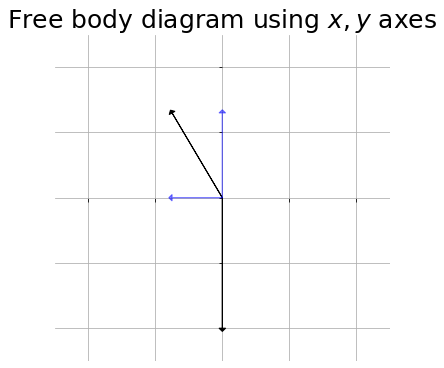

In [17]:
# Draw FBD
ax = vector_fig_setup()
clear_ax_tick_labels(ax)
hide_spines(ax)
ramp_angle = 30
F_g = 4 # this will be equal to mg
# we don't know a priori what the magnitude F_N is
# However, we pick a value so we can visualize it
F_N = 3 

# We do know the angles for each since gravity points down
# and the normal force is perpendicular to the surface
g_angle = -90
N_angle = ramp_angle + 90


draw_vector_r_theta(ax, F_g, g_angle, 'black') # Gravitational Force (directly down)
draw_vector_r_theta(ax, F_N, N_angle, 'black') # Normal Force (perpendicular to ramp)

# draw x and y components for F_N
F_Nx = F_N * np.cos(np.deg2rad(N_angle))
F_Ny = F_N * np.sin(np.deg2rad(N_angle))
draw_vector_component(ax, F_Nx, 0, 'blue', alpha=.5)
draw_vector_component(ax, 0, F_Ny, 'blue', alpha=.5)

plt.title("Free body diagram using $x, y$ axes", fontsize=title_size)

From the FBD, we can again read off that the net force $\vec{F}_{\text{net}} = \vec{F}_N + \vec{F}_g$ since these are the only two forces in the diagram.

Breaking it down into components, we have
$$ y: {F}_{\text{net}, y} = {F}_{N,y} + {F}_{g,y}$$
$$ x: {F}_{\text{net}, x} = {F}_{N,x} + {F}_{g,x}$$

The only simplification we get is that $F_g$ is fully along the $y$ axis, leaving us with 
$$ y: {F}_{\text{net}, y} = {F}_{N,y} + {F}_{g,y} = m a_y$$
$$ x: {F}_{\text{net}, x} = {F}_{N,x} = m a_x$$



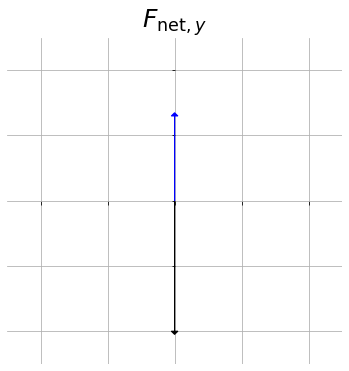

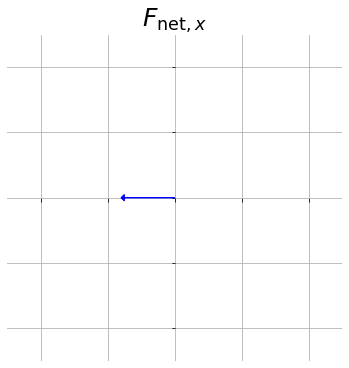

In [18]:
# Draw FBD
# y component
ax1 = vector_fig_setup()
clear_ax_tick_labels(ax1)
hide_spines(ax1)
plt.title(r"$F_{\mathrm{net}, y}$", fontsize=title_size)
draw_vector_component(ax1, 0, -F_g, 'black') # Gravitational Force (directly down)
draw_vector_component(ax1, 0, F_Ny, 'blue') # Normal Force (perpendicular to ramp)

# x component
ax2 = vector_fig_setup()
clear_ax_tick_labels(ax2)
hide_spines(ax2)
plt.title(r"$F_{\mathrm{net}, x}$", fontsize=title_size)
draw_vector_component(ax2, F_Nx, 0, 'blue') # Normal Force (perpendicular to ramp)

At this stage, we have 2 equations and 3 unknowns, $|F_N|, a_y, a_x$. To be able to solve for the variables, we would have to introduce one more piece of information. Here is where we would use our physical reasoning that the block should slide down the ramp. This essentially dictates the angle of the acceleration vector, which tells us that $\frac{a_y}{a_x} = \tan \theta$. 

With that piece of information, we could then solve the system of equations to find the correct acceleration (and motion of the box). We won't do that here (though you are highly encouraged to finish the calculation on your own if you are looking for more practice!), but instead we will revisit the problem using a different set of coordinates.



## Free body for an object sliding on a ramp (using $x', y'$)



In this section we will combine the two lessons from this notebook. The first is that you are free to choose any set of perpendicular axes for decomposing your vectors. The second is incorporating our physical reasoning about how the block must move. We will use the latter to inform our choice of axis!

Because we know that the block should slide down the ramp, we know that the acceleration of the block should be *solely* in that direction. Because the acceleration is in that direction, so too must the net force, which means that the component of $F_{\text{net}}$ in the perpendicular direction must be 0. (See the **key takeaway** from the sliding block earlier)

Knowing that the motion is directed along the ramp, we can choose our axes to look like so



Text(0.5, 1.0, "Free body diagram using $x', y'$ axes")

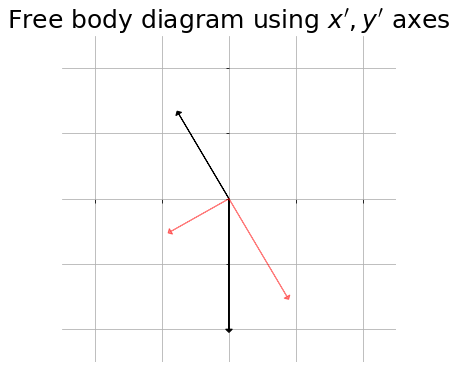

In [19]:
# FBD with x',y' axes
ax = vector_fig_setup()
clear_ax_tick_labels(ax)
hide_spines(ax)
ramp_angle = 30
F_g = 4 # this will be equal to mg
# we don't know a priori what the magnitude F_N is
# However, we pick a value so we can visualize it
F_N = 3 

# We do know the angles for each since gravity points down
# and the normal force is perpendicular to the surface
g_angle = -90
N_angle = ramp_angle + 90


draw_vector_r_theta(ax, F_g, g_angle, 'black') # Gravitational Force (directly down)
draw_vector_r_theta(ax, F_N, N_angle, 'black') # Normal Force (perpendicular to ramp)

# draw x and y components for F_N
F_gx, F_gy = decompose_vector_axis(0, -F_g, ramp_angle)
draw_vector_r_theta(ax, F_gx, ramp_angle, 'red', alpha=.5)
draw_vector_r_theta(ax, F_gy, ramp_angle + 90, 'red', alpha=.5)

plt.title("Free body diagram using $x', y'$ axes", fontsize=title_size)

Again, we have that $\vec{F}_{\text{net}} = \vec{F}_N + \vec{F}_g$, since the FBD didn't change, just our choice of axes.

Decomposing the vectors onto $x',y'$, we get

$$ y': {F}_{\text{net}, y'} = {F}_{N,y'} + {F}_{g,y'}$$
$$ x': {F}_{\text{net}, x'} = {F}_{N,x'} + {F}_{g,x'}$$

Simplifying and using Newton's Second Law, we get

$$ y': {F}_{\text{net}, y'} = {F}_{N} + {F}_{g,y'} = 0$$
$$ x': {F}_{\text{net}, x'} =  {F}_{g,x'} = m a_{x'}$$



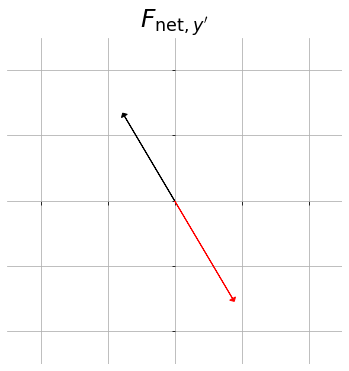

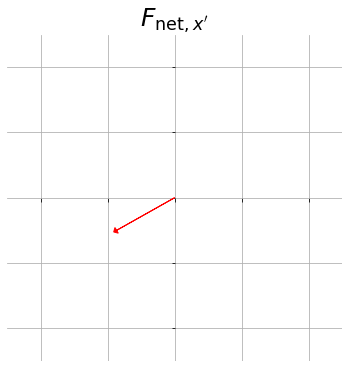

In [20]:
# Draw FBD componenst
# y' component
ax1 = vector_fig_setup()
clear_ax_tick_labels(ax1)
hide_spines(ax1)
plt.title(r"$F_{\mathrm{net}, y'}$", fontsize=title_size)
draw_vector_r_theta(ax1, F_gy, ramp_angle + 90, 'red') # Gravitational Force (directly down)
draw_vector_r_theta(ax1, F_N, ramp_angle + 90, 'black') # Normal Force (perpendicular to ramp)

# x' component
ax2 = vector_fig_setup()
clear_ax_tick_labels(ax2)
hide_spines(ax2)
plt.title(r"$F_{\mathrm{net}, x'}$", fontsize=title_size)
draw_vector_r_theta(ax2, F_gx, ramp_angle, 'red') # Normal Force (perpendicular to ramp)

There are a few key differences compared to the last section

-   Previously $F_g$ was solely in the $y$ direction, but now has components in both $x',y'$
-   Now, $F_N$ is the one that is aligned with the $y'$ axis
-   Because there is no motion "off" the ramp, we can set the first equation equal to 0!

Note that this set of 2 equations only has 2 unknowns, $F_N and a_{x'}$. Thus, we can proceed as normal to solve for the resulting acceleration in the $x'$ direction



### Why was this simpler than the last one?



It may seem a big puzzling that the second method seemed to "unlock" the correct answer by having 2 equations and 2 unknowns vs 2 equations and 3 unknowns. 

The difference is simply at what step we had to use our physical reasoning. When decomposing onto the $x,y$ components, we had to relate $a_x$ and $a_y$ using knowledge about the ramp. However, we used that same information in the second approach right from the get-go. It was built into our choice of axes!



### Takeaway



Both approaches are equally valid, and you will never get the <span class="underline">wrong</span> answer by following Newton's second law carefully. What we have demonstrated here is that by using this physical knowledge to our advantage, we could make the form of Newton's second law equations a tiny bit easier to solve. This is a skill that we will be revisiting over and over again.

